# [Fashion MNIST](https://keras.io/api/datasets/fashion_mnist/)

This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images

The classes are:

| Label |	Description |
|-------|-------------|
| 0 |	T-shirt/top |
| 1 |	Trouser |
| 2 |	Pullover |
| 3 |	Dress |
| 4 |	Coat |
| 5 |	Sandal |
| 6 |	Shirt |
| 7 |	Sneaker |
| 8 |	Bag |
| 9 |	Ankle boot |

## Setup

In [6]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import datetime

%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


## Prepare the data

In [2]:
# Model / data parameters
LABEL_NAMES = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test_num) = keras.datasets.fashion_mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test_num, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


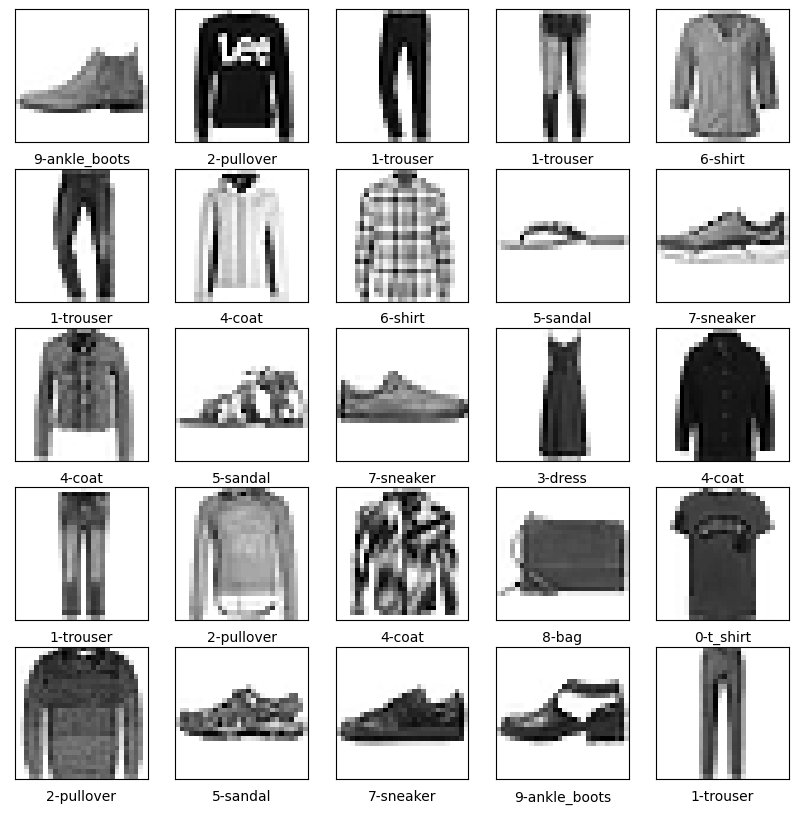

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

num_classes = 10
# input image dimensions
img_rows, img_cols = 28, 28

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_test[i].reshape(img_rows, img_cols), cmap=plt.cm.binary)
    plt.xlabel(f'{y_test_num[i]}-{LABEL_NAMES[y_test_num[i]]}')
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
plt.show()

## Build the model

In [4]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        #layers.Dropout(0.5),
        layers.Dense(128, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

2022-12-16 17:48:51.267438: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-16 17:48:51.267456: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-16 17:48:51.267475: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (cocombra3): /proc/driver/nvidia/version does not exist
2022-12-16 17:48:51.267719: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Train the model

In [7]:
batch_size = 128
epochs = 10

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(x_train, 
          y_train, 
          batch_size=batch_size, 
          epochs=epochs, 
          validation_split=0.2, 
          callbacks=[tensorboard_callback])

Epoch 1/10
375/375 [==============================] - 4s 10ms/step - loss: 0.5793 - accuracy: 0.7922 - val_loss: 0.4152 - val_accuracy: 0.8487
Epoch 2/10
375/375 [==============================] - 4s 10ms/step - loss: 0.3691 - accuracy: 0.8680 - val_loss: 0.3460 - val_accuracy: 0.8776
Epoch 3/10
375/375 [==============================] - 4s 10ms/step - loss: 0.3209 - accuracy: 0.8837 - val_loss: 0.3244 - val_accuracy: 0.8866
Epoch 4/10
375/375 [==============================] - 4s 10ms/step - loss: 0.2915 - accuracy: 0.8952 - val_loss: 0.3050 - val_accuracy: 0.8872
Epoch 5/10
375/375 [==============================] - 4s 10ms/step - loss: 0.2695 - accuracy: 0.9011 - val_loss: 0.2870 - val_accuracy: 0.9003
Epoch 6/10
375/375 [==============================] - 4s 10ms/step - loss: 0.2512 - accuracy: 0.9084 - val_loss: 0.2799 - val_accuracy: 0.8997
Epoch 7/10
375/375 [==============================] - 4s 11ms/step - loss: 0.2293 - accuracy: 0.9159 - val_loss: 0.2593 - val_accuracy: 0.9077

In [8]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 9056), started 0:01:27 ago. (Use '!kill 9056' to kill it.)

## Evaluate the trained model

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.2829475700855255
Test accuracy: 0.9018999934196472
